# Ï∫êÍ∏Ä Ï∞∏Ïó¨ ÎßÅÌÅ¨

https://www.kaggle.com/t/05f287fe67bb43298d8c3e66a1e71c27

# House Prices üè†

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('train.csv')
test_df_org = pd.read_csv('./test.csv')

house_df = house_df_org.copy()
test_df = test_df_org.copy()
print(f"training dataset : \n {house_df.head(3)}", end="\n")
print(f"test dataset : \n {test_df.head(3)}", end="\n")
print(f"training dataset shape : {house_df.shape}", end="\n")
print(f"test dataset shape : {test_df.shape}", end="\n")

training dataset : 
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  968          20       RL          NaN     7390   Pave   NaN      IR1   
1  739          90       RL         60.0    10800   Pave   NaN      Reg   
2  696          20       RL         54.0    13811   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      7   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      3   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      7   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     135000  
1   2009        WD         Alloca     179000  
2   2006        WD         Normal     176000  

[3 rows x 81 columns]
test dataset : 
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   86          60       RL        121.0    16059 

In [2]:


def check_data_type(df=None):
    # Create a dictionary of column names and their data types
    dic = {col: df[col].dtype for col in df.columns}
    dic = {k: [col for col, v in dic.items() if v == k] for k in set(dic.values())}
    print("\n".join(f"{k}: {len(v)} : {v}" for k, v in dic.items()))

print(f"train data ")
print(check_data_type(house_df))
print(f"test data ")
print(check_data_type(test_df))

isnull_series = house_df.isnull().sum()
print('Training : Null column & count:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

isnull_series = test_df.isnull().sum()
print('Test : Null column & count:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))



train data 
int64: 35 : ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
object: 43 : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual'

In [3]:
def impute_missing_values(df=house_df):
    # Impute missing values in categorical columns with 'None'
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence']:
            df[col] = df[col].fillna('None')  # More specific "None"
        elif col == 'MasVnrType':
            df[col] = df[col].fillna('None')
        elif col == 'FireplaceQu':
            df[col] = df[col].fillna('NoFireplace')
        elif col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
            df[col] = df[col].fillna('None')
        elif col == 'Electrical':
            df[col] = df[col].fillna(df['Electrical'].mode()[0])  # Mode for Electrical (only 1 missing)
        else:
            df[col] = df[col].fillna('None')  # Default 'None' for others

    # Impute missing values in numerical columns with the median
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    #for col in numerical_cols:
    #    df[col] = df[col].fillna(df[col].median())
    ## or groupby median by knn
    from sklearn.impute import KNNImputer
    # Apply KNN Imputation to numerical columns with missing data
    imputer = KNNImputer(n_neighbors=5)  # You can tune n_neighbors
    df[numerical_missing_cols] = imputer.fit_transform(df[numerical_missing_cols])

    return df

impute_missing_values(house_df)
print("taining data : Missing Value Handling Complete : ")
print(house_df.isnull().sum().sum())  # Should print 0
impute_missing_values(test_df)
print("test data : Missing Value Handling Complete : ")
print(test_df.isnull().sum().sum())  # Should print 0



NameError: name 'numerical_missing_cols' is not defined

### Skewed 'saleprice' => normalization  

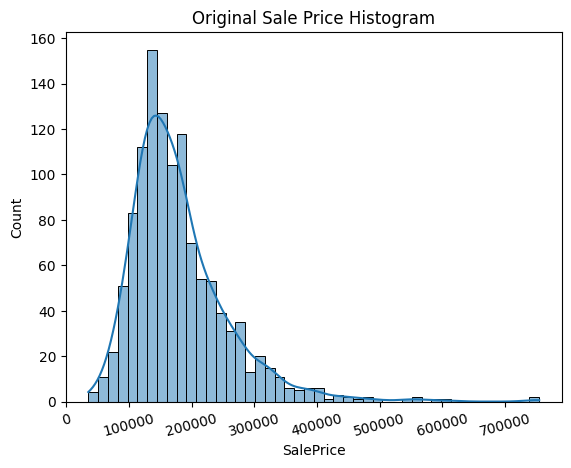

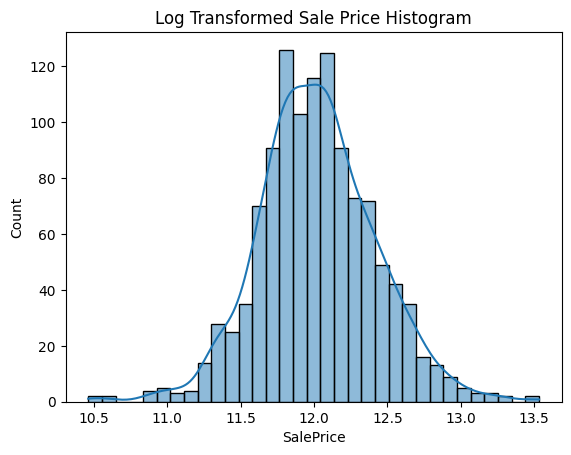

In [ ]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [ ]:
# SalePrice Î°úÍ∑∏ Î≥ÄÌôò
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])




In [ ]:
# for hot encoding, 
# with pd.get_dummies(), should have all dataset columns [ train + test ]
print('Training Shape:', house_df.shape)
print('Test Shape:', test_df.shape)

# separate target variable
y = house_df['SalePrice']
X = house_df #.drop(['SalePrice'], axis=1)
# merge train and test data for one-hot encoding
X_test = test_df.copy()
X_test['SalePrice'] = np.nan
X = pd.concat([X, X_test], axis=0, ignore_index=True)
print('ALL dataset after get_dummies : Shape :', X.shape)
# one-hot encoding
X = pd.get_dummies(X, drop_first=True)
print('ALL dataset with OHE after get_dummies : Shape :', X.shape)
# separate train and test data
X_train = X[X['SalePrice'].notnull()]
X_test = X[X['SalePrice'].isnull()]
X_train = X_train.drop(['SalePrice'], axis=1)
X_test = X_test.drop(['SalePrice'], axis=1)
print('Ater Training with OHE : Shape:', X_train.shape)
print('Ater Test with OHE : Shape:', X_test.shape)
# check the columns are same
X_train_columns = set(X_train.columns)
X_test_columns = set(X_test.columns)
if X_train_columns != X_test_columns:
    print("Columns are not the same between train and test data after OHE.")
else:
    print("Columns are the same between train and test data after OHE.")


Training Shape: (1168, 81)
Test Shape: (292, 80)
ALL dataset after get_dummies : Shape : (1460, 81)
ALL dataset with OHE after get_dummies : Shape : (1460, 261)
Ater Training with OHE : Shape: (1168, 260)
Ater Test with OHE : Shape: (292, 260)
Columns are the same between train and test data after OHE.


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = y #house_df_ohe['SalePrice']
X_features = X_train #house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156) # reuse X_train here 
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")
# --- Model Training and Evaluation ---

X_train shape : (934, 260)
X_test shape : (234, 260)
y_train shape : (934,)
y_test shape : (234,)


## split the training dataset and train them with different models 
## dimension reduction
 

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# --- Feature Selection ---

# 1. Variance Threshold
selector = VarianceThreshold(threshold=0.001)
X_train_variance = selector.fit_transform(X_train_scaled_df)
X_test_variance = selector.transform(X_test_scaled_df)

selected_feature_mask_variance = selector.get_support()
X_train_variance_df = pd.DataFrame(X_train_variance, columns=X_train_scaled_df.columns[selected_feature_mask_variance])
X_test_variance_df = pd.DataFrame(X_test_variance, columns=X_test_scaled_df.columns[selected_feature_mask_variance])


# 2. Lasso (L1 Regularization)
lasso = Lasso(alpha=0.04)  # You'll need to tune alpha / 1st: 0.01
lasso.fit(X_train_variance_df, y_train)

selected_features_lasso = X_train_variance_df.columns[lasso.coef_ != 0].tolist()
X_train_lasso = X_train_variance_df[selected_features_lasso]
X_test_lasso = X_test_variance_df[selected_features_lasso]

# 3. Random Forest Feature Importance (Alternative to Lasso, or you could combine)
model = RandomForestRegressor(n_estimators=50, random_state=42)  # Tune n_estimators / 1st: 100
model.fit(X_train_lasso, y_train)

importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train_lasso.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

top_k_features = feature_importances['Feature'][:50].tolist()  # Tune k (number of top features)
X_train_selected = X_train_lasso[top_k_features]
X_test_selected = X_test_lasso[top_k_features]


# --- Final Feature Set ---
X_train_preprocessed = X_train_selected
X_test_preprocessed = X_test_selected

In [ ]:
def get_rmse(model):
    pred = model.predict(X_test)
    pred_exp = np.expm1(pred)
    mse = mean_squared_error(np.expm1(y_test) , pred_exp)
    rmse = np.sqrt(mse)
    print('{0} Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    print('{0} Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: {1}'.format(model.__class__.__name__,np.round(mse, 3)))

    print('{0} Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    print('{0} Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: {1}'.format(model.__class__.__name__,np.round(mse, 3)))

    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

## MODELS & ERRORS
model : LinearRegression, Ridge, Lasso
error : RMSE

In [ ]:

# LinearRegression, Ridge, Lasso
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 21972.724
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 482800613.392
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 21972.724
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 482800613.392
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 22992.996
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 528677887.23
Ridge Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 22992.996
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 528677887.23
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 33951.659
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 1152715124.917
Lasso Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 33951.659
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 1152715124.917


[np.float64(21972.72430520335),
 np.float64(22992.996482186532),
 np.float64(33951.658647514254)]

In [ ]:
def get_top_bottom_coef(model):
    # coef_ ÏÜçÏÑ±ÏùÑ Í∏∞Î∞òÏúºÎ°ú Series Í∞ùÏ≤¥Î•º ÏÉùÏÑ±. indexÎäî Ïª¨ÎüºÎ™Ö.
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + ÏÉÅÏúÑ 10Í∞ú , - ÌïòÏúÑ 10Í∞ú coefficient Ï∂îÏ∂úÌïòÏó¨ Î∞òÌôò.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

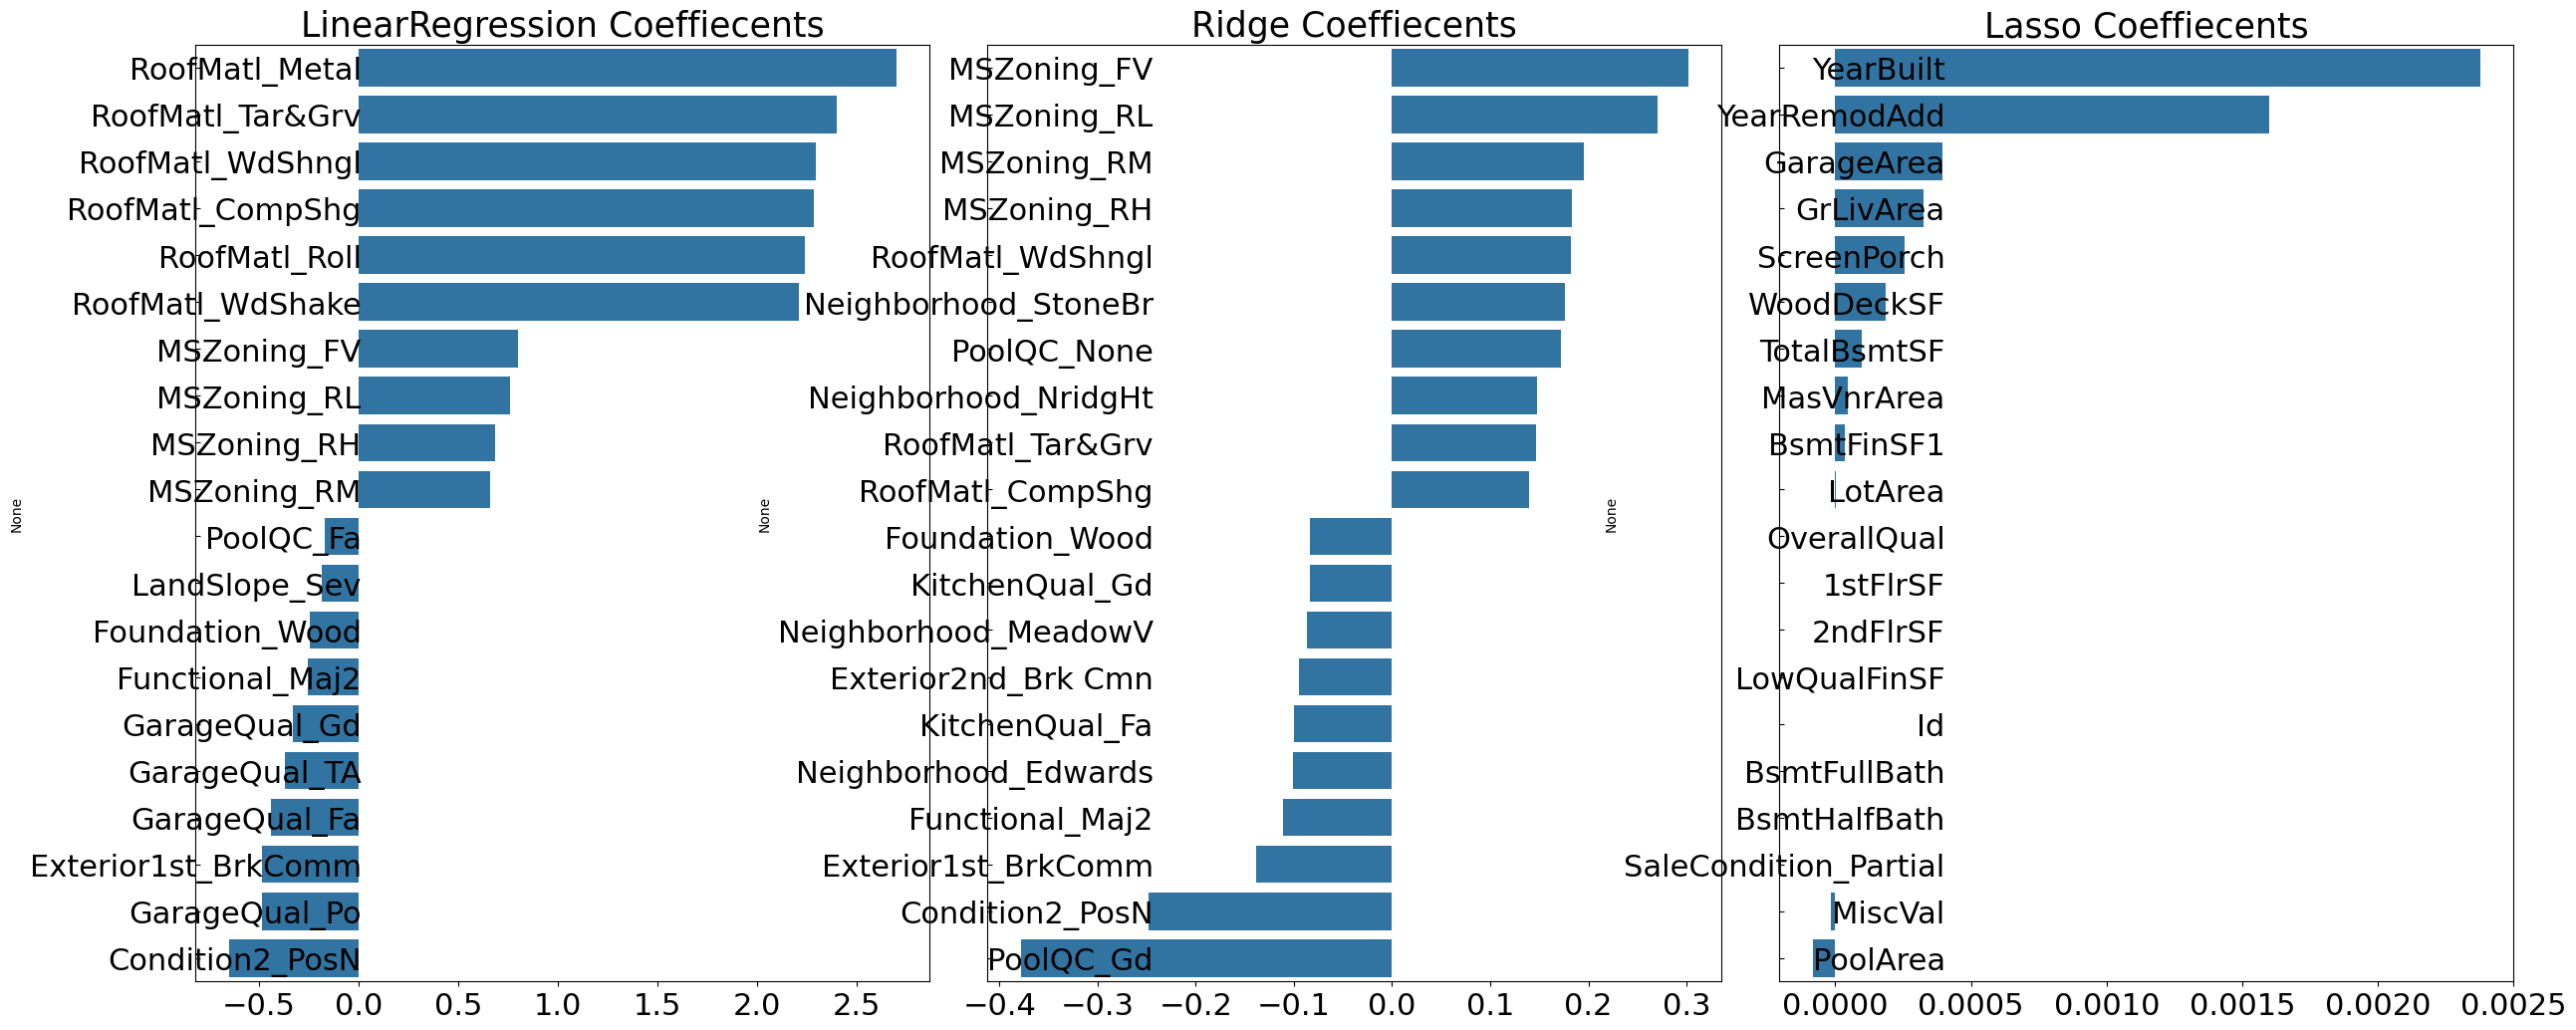

In [ ]:
def visualize_coefficient(models):
    # 3Í∞ú ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ 3Í∞úÏùò Ïª¨ÎüºÏùÑ Í∞ÄÏßÄÎäî subplot ÏÉùÏÑ±
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    # ÏûÖÎ†•Ïù∏ÏûêÎ°ú Î∞õÏùÄ listÍ∞ùÏ≤¥Ïù∏ modelsÏóêÏÑú Ï∞®Î°ÄÎ°ú modelÏùÑ Ï∂îÏ∂úÌïòÏó¨ ÌöåÍ∑Ä Í≥ÑÏàò ÏãúÍ∞ÅÌôî.
    for i_num, model in enumerate(models):
        # ÏÉÅÏúÑ 10Í∞ú, ÌïòÏúÑ 10Í∞ú ÌöåÍ∑Ä Í≥ÑÏàòÎ•º Íµ¨ÌïòÍ≥†, Ïù¥Î•º ÌåêÎã§Ïä§ concatÏúºÎ°ú Í≤∞Ìï©.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # ÏàúÏ∞®Ï†ÅÏúºÎ°ú ax subplotÏóê barcharÎ°ú ÌëúÌòÑ. Ìïú ÌôîÎ©¥Ïóê ÌëúÌòÑÌïòÍ∏∞ ÏúÑÌï¥ tick label ÏúÑÏπòÏôÄ font ÌÅ¨Í∏∞ Ï°∞Ï†ï.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# Ïïû ÏòàÏ†úÏóêÏÑú ÌïôÏäµÌïú lr_reg, ridge_reg, lasso_reg Î™®Îç∏Ïùò ÌöåÍ∑Ä Í≥ÑÏàò ÏãúÍ∞ÅÌôî.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # Î∂ÑÌï†ÌïòÏßÄ ÏïäÍ≥† Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú cross_val_score( ) ÏàòÌñâ. Î™®Îç∏Î≥Ñ CV RMSEÍ∞íÍ≥º ÌèâÍ∑† RMSE Ï∂úÎ†•
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE Í∞í Î¶¨Ïä§Ìä∏: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV ÌèâÍ∑† RMSE Í∞í: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# Ïïû ÏòàÏ†úÏóêÏÑú ÌïôÏäµÌïú lr_reg, ridge_reg, lasso_reg Î™®Îç∏Ïùò CV RMSEÍ∞í Ï∂úÎ†•
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE Í∞í Î¶¨Ïä§Ìä∏: [0.245 0.307 0.146 0.133 0.126]
LinearRegression CV ÌèâÍ∑† RMSE Í∞í: 0.191

Ridge CV RMSE Í∞í Î¶¨Ïä§Ìä∏: [0.216 0.174 0.125 0.135 0.123]
Ridge CV ÌèâÍ∑† RMSE Í∞í: 0.155

Lasso CV RMSE Í∞í Î¶¨Ïä§Ìä∏: [0.287 0.212 0.173 0.185 0.17 ]
Lasso CV ÌèâÍ∑† RMSE Í∞í: 0.205


In [ ]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV Ïãú ÏµúÏ†Å ÌèâÍ∑† RMSE Í∞í: {1}, ÏµúÏ†Å alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV Ïãú ÏµúÏ†Å ÌèâÍ∑† RMSE Í∞í: 0.1529, ÏµúÏ†Å alpha:{'alpha': 15}
Lasso 5 CV Ïãú ÏµúÏ†Å ÌèâÍ∑† RMSE Í∞í: 0.157, ÏµúÏ†Å alpha:{'alpha': 0.001}


LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 21972.724
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 482800613.392
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 21972.724
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 482800613.392
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 23812.181
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 567019962.125
Ridge Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 23812.181
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 567019962.125
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 25000.609
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 625030469.211
Lasso Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 25000.609
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 625030469.211


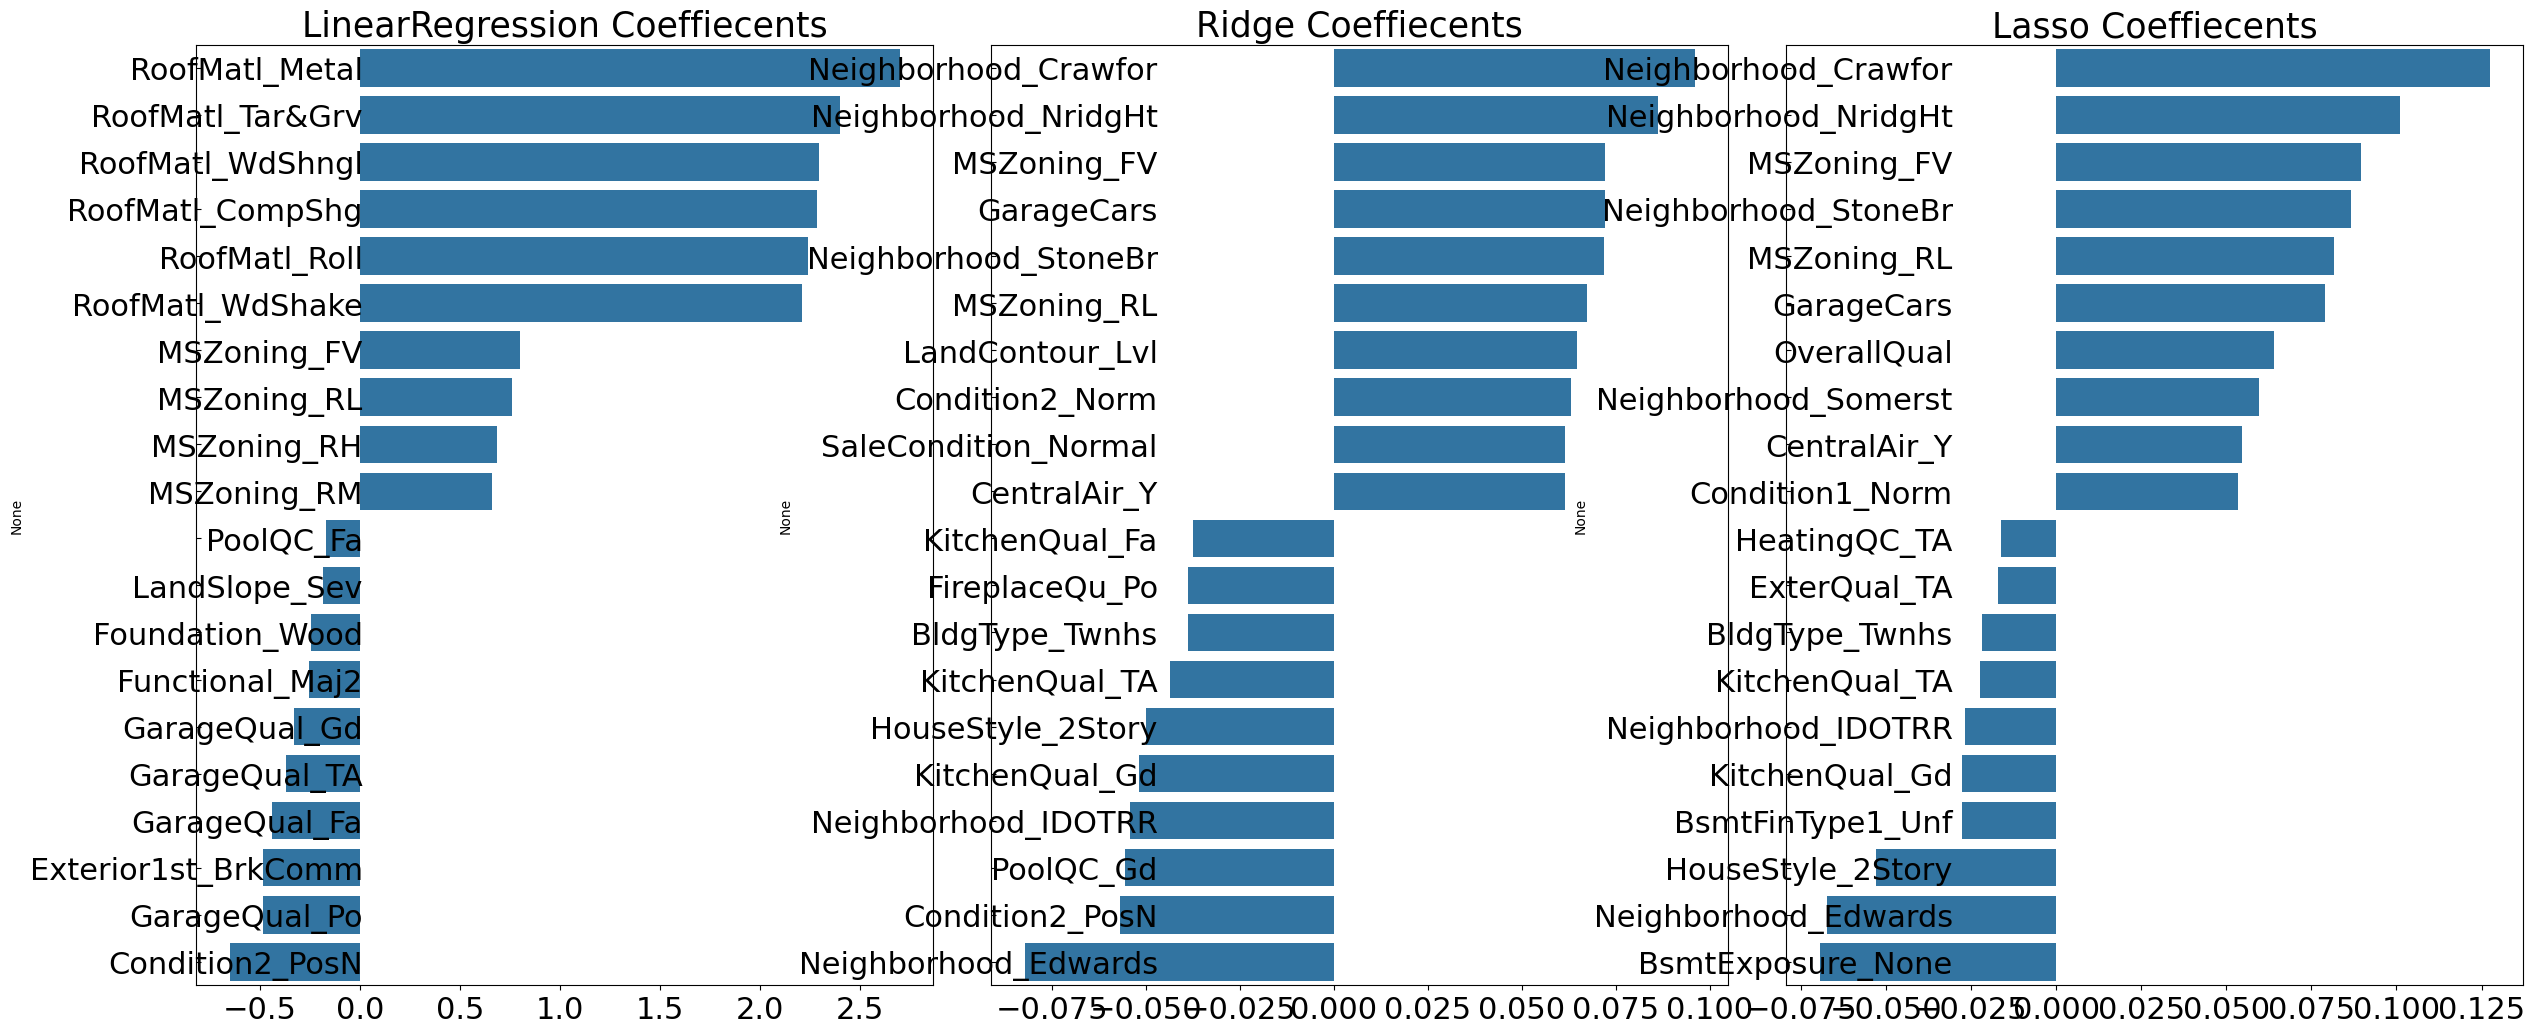

In [ ]:
# ÏïûÏùò ÏµúÏ†ÅÌôî alphaÍ∞íÏúºÎ°ú ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏° Î∞è ÌèâÍ∞Ä ÏàòÌñâ.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# Î™®Îì† Î™®Îç∏Ïùò RMSE Ï∂úÎ†•
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# Î™®Îì† Î™®Îç∏Ïùò ÌöåÍ∑Ä Í≥ÑÏàò ÏãúÍ∞ÅÌôî
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
from scipy.stats import skew

# objectÍ∞Ä ÏïÑÎãå Ïà´ÏûêÌòï ÌîºÏ≤òÏùò ÏπºÎüº index Í∞ùÏ≤¥ Ï∂îÏ∂ú.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_dfÏóê ÏπºÎüº indexÎ•º [ ]Î°ú ÏûÖÎ†•ÌïòÎ©¥ Ìï¥ÎãπÌïòÎäî ÏπºÎüº Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Î∞òÌôò. apply lambdaÎ°ú skew( ) Ìò∏Ï∂ú
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(ÏôúÍ≥°) Ï†ïÎèÑÍ∞Ä 1 Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎßå Ï∂îÏ∂ú.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          22.099034
PoolArea         14.377604
LotArea          11.097791
3SsnPorch        11.040646
LowQualFinSF      9.608861
BsmtFinSF2        4.507199
KitchenAbvGr      4.488325
BsmtHalfBath      4.133732
ScreenPorch       3.976766
EnclosedPorch     3.093917
LotFrontage       2.785666
OpenPorchSF       2.454159
MasVnrArea        2.420783
BsmtFinSF1        1.881057
TotalBsmtSF       1.864686
WoodDeckSF        1.546567
1stFlrSF          1.488257
GrLivArea         1.474257
MSSubClass        1.391605
dtype: float64


In [ ]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [ ]:
# SkewÍ∞Ä ÎÜíÏùÄ ÌîºÏ≤òÎì§ÏùÑ Î°úÍ∑∏ Î≥ÄÌôò ÌñàÏúºÎØÄÎ°ú Îã§Ïãú Ïõê-Ìï´ Ïù∏ÏΩîÎî© Ï†ÅÏö© Î∞è ÌîºÏ≤ò/ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ ÏÖã ÏÉùÏÑ±,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# ÌîºÏ≤òÎì§ÏùÑ Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Îã§Ïãú ÏµúÏ†Å ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ÏôÄ RMSE Ï∂úÎ†•
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV Ïãú ÏµúÏ†Å ÌèâÍ∑† RMSE Í∞í: 0.1338, ÏµúÏ†Å alpha:{'alpha': 10}
Lasso 5 CV Ïãú ÏµúÏ†Å ÌèâÍ∑† RMSE Í∞í: 0.1299, ÏµúÏ†Å alpha:{'alpha': 0.001}


LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 20489.138
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 419804795.555
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 20489.138
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 419804795.555
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 21654.471
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 468916128.052
Ridge Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 21654.471
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 468916128.052
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 22238.089
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 494532595.76
Lasso Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 22238.089
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 494532595.76


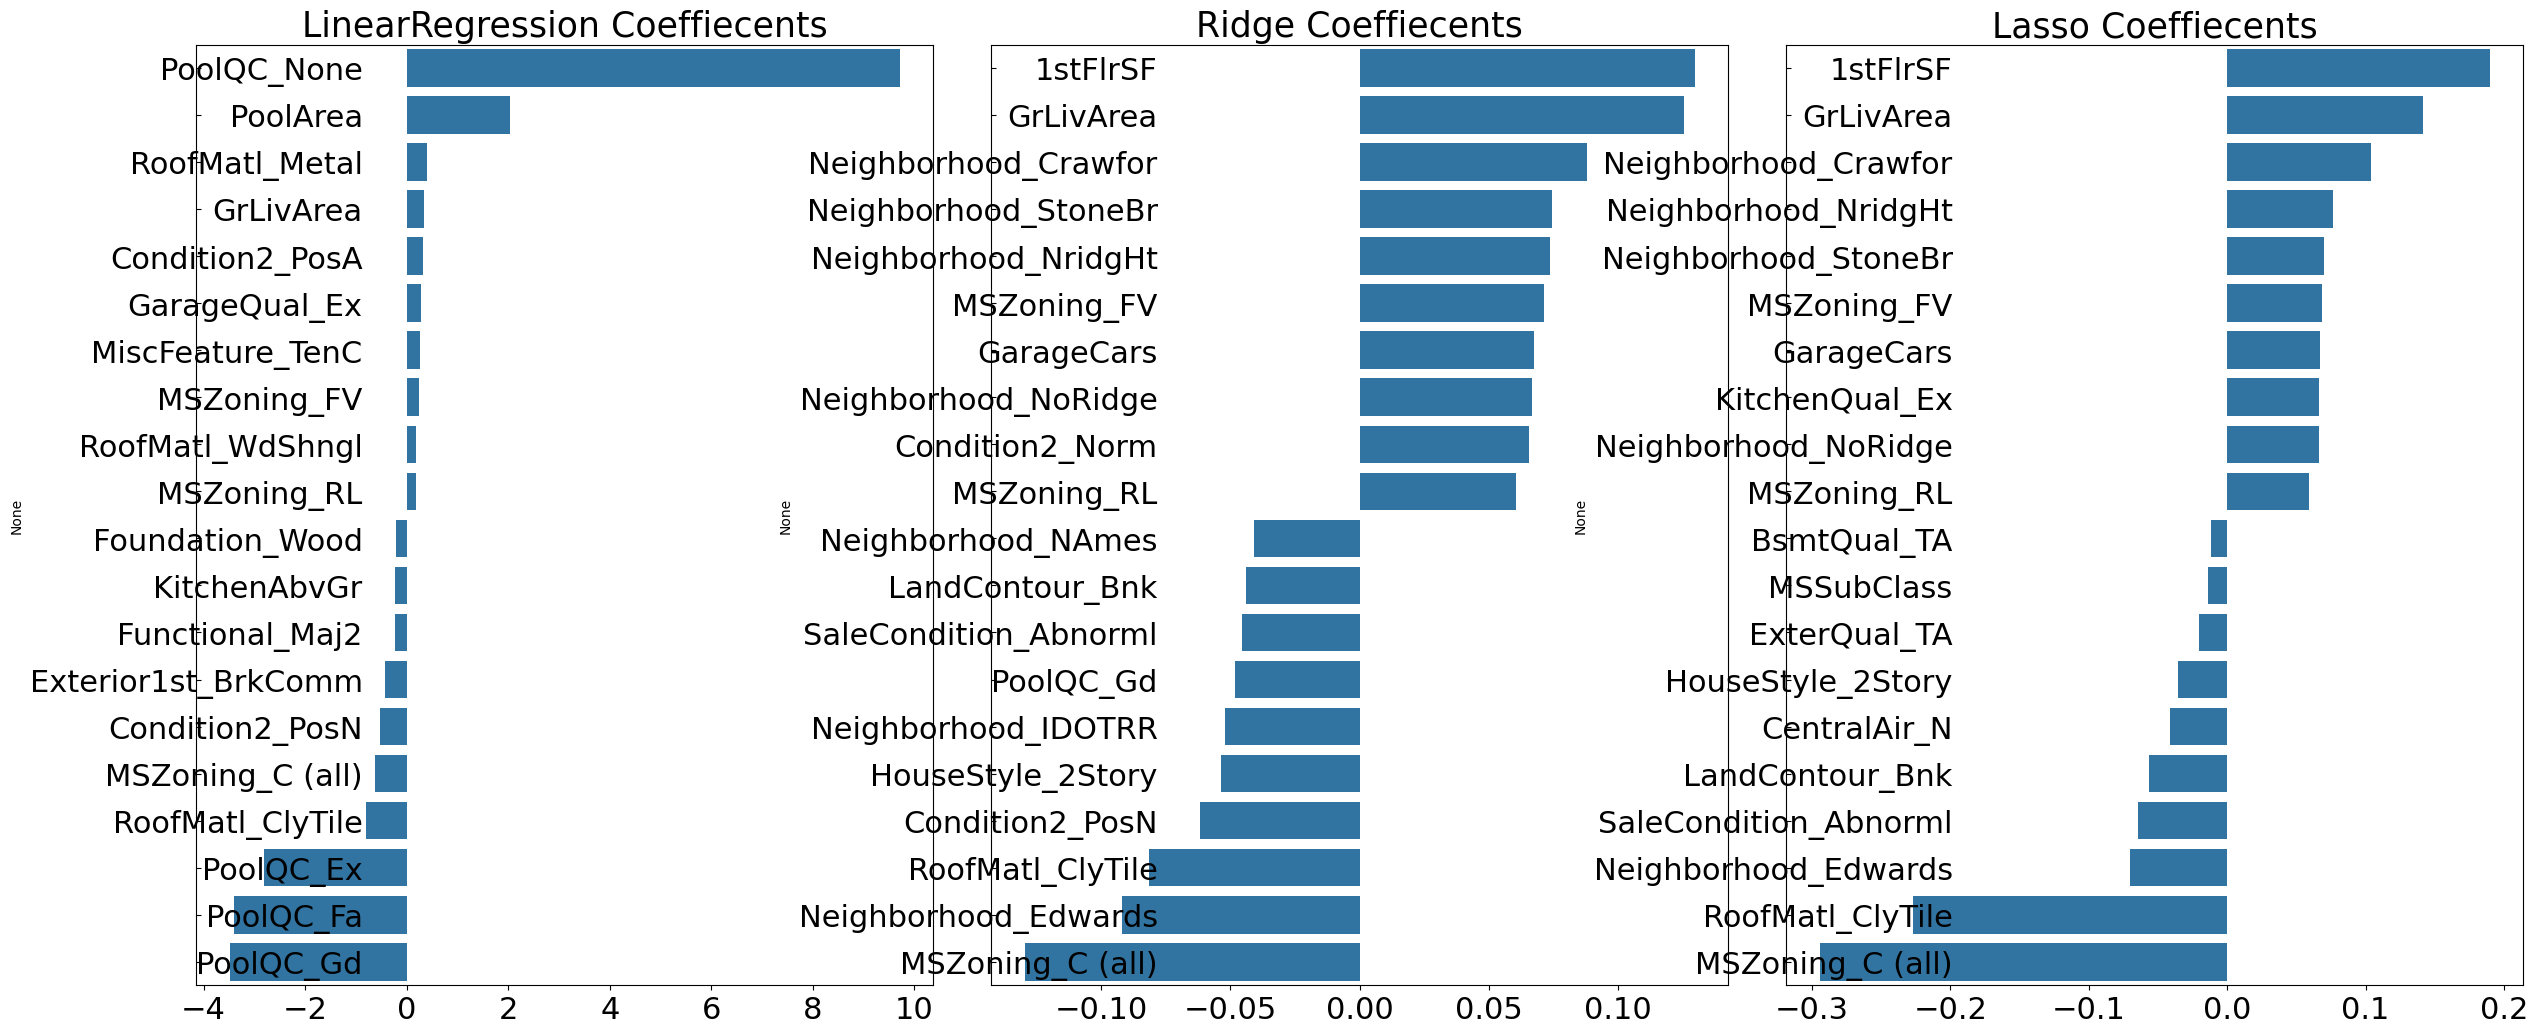

In [ ]:
# ÏïûÏùò ÏµúÏ†ÅÌôî alphaÍ∞íÏúºÎ°ú ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏° Î∞è ÌèâÍ∞Ä ÏàòÌñâ.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# Î™®Îì† Î™®Îç∏Ïùò RMSE Ï∂úÎ†•
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# Î™®Îì† Î™®Îç∏Ïùò ÌöåÍ∑Ä Í≥ÑÏàò ÏãúÍ∞ÅÌôî
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

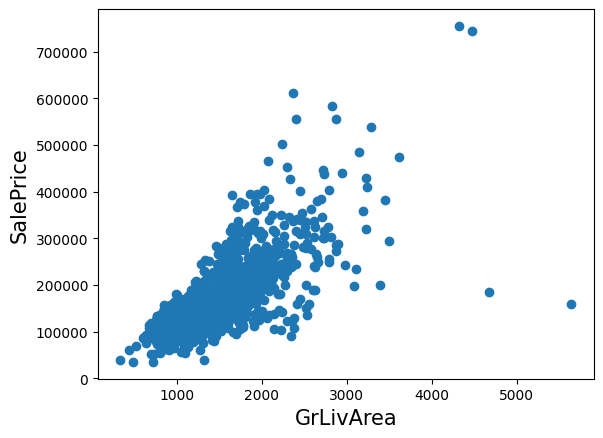

In [ ]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [ ]:
# GrLivAreaÏôÄ SalePrice Î™®Îëê Î°úÍ∑∏ Î≥ÄÌôòÎêòÏóàÏúºÎØÄÎ°ú Ïù¥Î•º Î∞òÏòÅÌïú Ï°∞Í±¥ ÏÉùÏÑ±.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('ÏïÑÏõÉÎùºÏù¥Ïñ¥ Î†àÏΩîÎìú index :', outlier_index.values)
print('ÏïÑÏõÉÎùºÏù¥Ïñ¥ ÏÇ≠Ï†ú Ï†Ñ house_df_ohe shape:', house_df_ohe.shape)
# DataFrameÏùò indexÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏïÑÏõÉÎùºÏù¥Ïñ¥ Î†àÏΩîÎìú ÏÇ≠Ï†ú.
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('ÏïÑÏõÉÎùºÏù¥Ïñ¥ ÏÇ≠Ï†ú ÌõÑ house_df_ohe shape:', house_df_ohe.shape)

ÏïÑÏõÉÎùºÏù¥Ïñ¥ Î†àÏΩîÎìú index : [ 64 373]
ÏïÑÏõÉÎùºÏù¥Ïñ¥ ÏÇ≠Ï†ú Ï†Ñ house_df_ohe shape: (1168, 301)
ÏïÑÏõÉÎùºÏù¥Ïñ¥ ÏÇ≠Ï†ú ÌõÑ house_df_ohe shape: (1166, 301)


In [ ]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV Ïãú ÏµúÏ†Å ÌèâÍ∑† RMSE Í∞í: 0.1156, ÏµúÏ†Å alpha:{'alpha': 5}
Lasso 5 CV Ïãú ÏµúÏ†Å ÌèâÍ∑† RMSE Í∞í: 0.1134, ÏµúÏ†Å alpha:{'alpha': 0.001}


LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 22460.396
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 504469409.754
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 22460.396
LinearRegression Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 504469409.754
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 21112.912
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 445755039.079
Ridge Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 21112.912
Ridge Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 445755039.079
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú RMSE: 20353.499
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 414264937.668
Lasso Î°úÍ∑∏ Î≥ÄÌôòÌï¥ RMSE: 20353.499
Lasso Î°úÍ∑∏ Î≥ÄÌôòÎêú MSE: 414264937.668


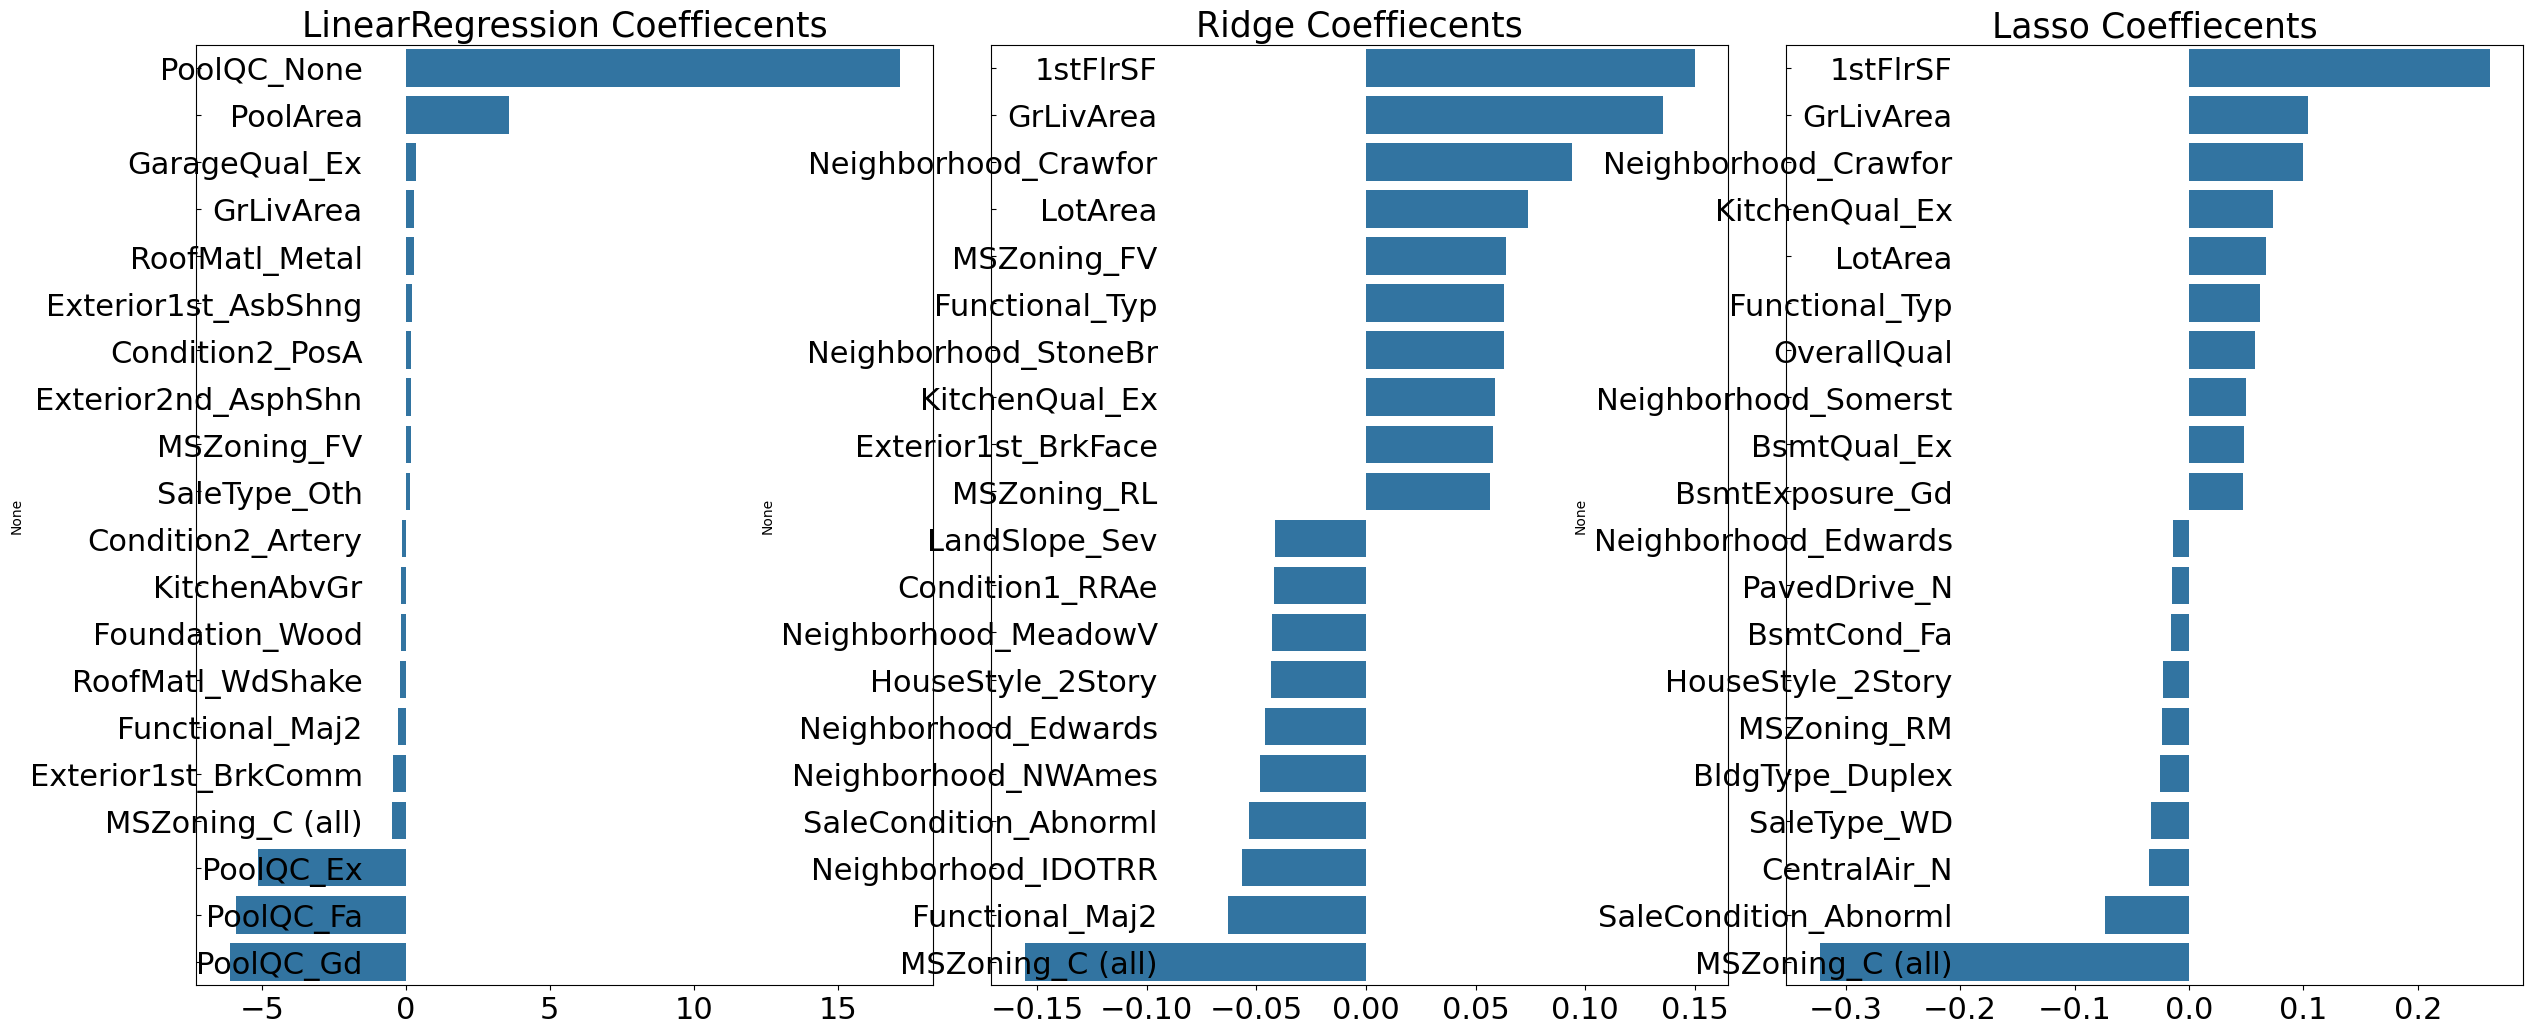

In [ ]:
# ÏïûÏùò ÏµúÏ†ÅÌôî alphaÍ∞íÏúºÎ°ú ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏° Î∞è ÌèâÍ∞Ä ÏàòÌñâ.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# Î™®Îì† Î™®Îç∏Ïùò RMSE Ï∂úÎ†•
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# Î™®Îì† Î™®Îç∏Ïùò ÌöåÍ∑Ä Í≥ÑÏàò ÏãúÍ∞ÅÌôî
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV Ïãú ÏµúÏ†Å ÌèâÍ∑† RMSE Í∞í: 0.1249, ÏµúÏ†Å alpha:{'n_estimators': 1000}


In [ ]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3231
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 185
[LightGBM] [Info] Start training from score 12.020420
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3214
[LightGBM] [Info] Number of data points in the train set: 933, number of used features: 176
[LightGBM] [Info] Start training from score 12.025656
[LightGBM] [Warning] Found w

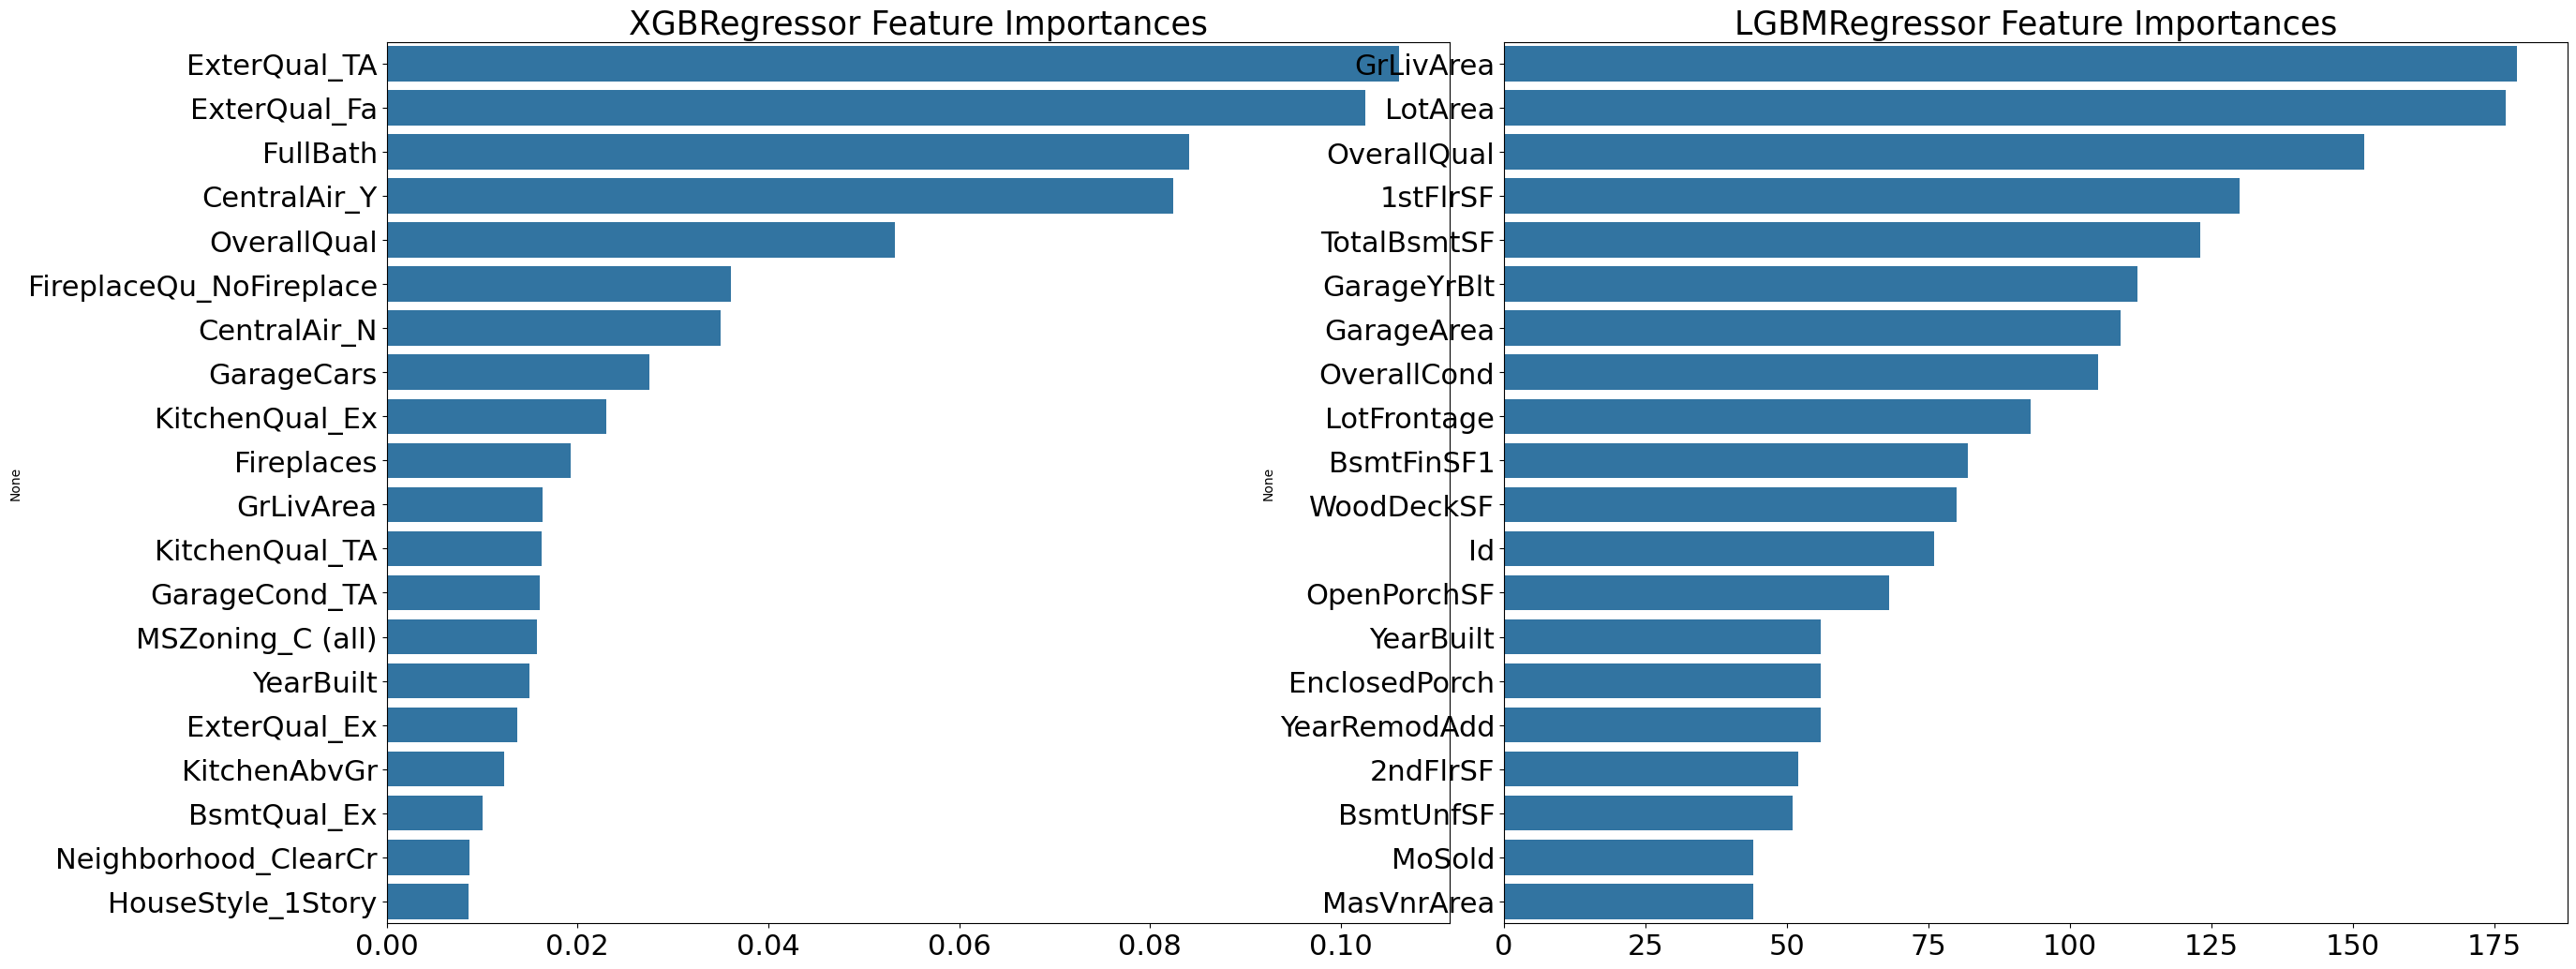

In [ ]:
# Î™®Îç∏Ïùò Ï§ëÏöîÎèÑ ÏÉÅÏúÑ 20Í∞úÏùò ÌîºÏ≤òÎ™ÖÍ≥º Í∑∏ÎïåÏùò Ï§ëÏöîÎèÑÍ∞íÏùÑ SeriesÎ°ú Î∞òÌôò.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2Í∞ú ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ 2Í∞úÏùò Ïª¨ÎüºÏùÑ Í∞ÄÏßÄÎäî subplot ÏÉùÏÑ±
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout()
    # ÏûÖÎ†•Ïù∏ÏûêÎ°ú Î∞õÏùÄ listÍ∞ùÏ≤¥Ïù∏ modelsÏóêÏÑú Ï∞®Î°ÄÎ°ú modelÏùÑ Ï∂îÏ∂úÌïòÏó¨ ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî.
    for i_num, model in enumerate(models):
        # Ï§ëÏöîÎèÑ ÏÉÅÏúÑ 20Í∞úÏùò ÌîºÏ≤òÎ™ÖÍ≥º Í∑∏ÎïåÏùò Ï§ëÏöîÎèÑÍ∞í Ï∂îÏ∂ú
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font ÌÅ¨Í∏∞ Ï°∞Ï†ï.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# Ïïû ÏòàÏ†úÏóêÏÑú print_best_params( )Í∞Ä Î∞òÌôòÌïú GridSearchCVÎ°ú ÏµúÏ†ÅÌôîÎêú Î™®Îç∏Ïùò ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [ ]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} Î™®Îç∏Ïùò RMSE: {1}'.format(key, rmse))

# Í∞úÎ≥Ñ Î™®Îç∏Ïùò ÌïôÏäµ
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# Í∞úÎ≥Ñ Î™®Îç∏ ÏòàÏ∏°
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# Í∞úÎ≥Ñ Î™®Îç∏ ÏòàÏ∏°Í∞í ÌòºÌï©ÏúºÎ°ú ÏµúÏ¢Ö ÏòàÏ∏°Í∞í ÎèÑÏ∂ú
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'ÏµúÏ¢Ö ÌòºÌï©': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#ÏµúÏ¢Ö ÌòºÌï© Î™®Îç∏, Í∞úÎ≥ÑÎ™®Îç∏Ïùò RMSE Í∞í Ï∂úÎ†•
get_rmse_pred(preds)

ÏµúÏ¢Ö ÌòºÌï© Î™®Îç∏Ïùò RMSE: 0.1129465487711197
Ridge Î™®Îç∏Ïùò RMSE: 0.11710652273556217
Lasso Î™®Îç∏Ïùò RMSE: 0.11227155526235916


In [ ]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'ÏµúÏ¢Ö ÌòºÌï©': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3218
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 174
[LightGBM] [Info] Start training from score 12.029584
ÏµúÏ¢Ö ÌòºÌï© Î™®Îç∏Ïùò RMSE: 0.11452430275126027
XGBM Î™®Îç∏Ïùò RMSE: 0.11533989336341832
LGBM Î™®Îç∏Ïùò RMSE: 0.12151384290751206


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Í∞úÎ≥Ñ Í∏∞Î∞ò Î™®Îç∏ÏóêÏÑú ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Ïù¥ ÏÇ¨Ïö©Ìï† ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # ÏßÄÏ†ïÎêú n_foldsÍ∞íÏúºÎ°ú KFold ÏÉùÏÑ±.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #Ï∂îÌõÑÏóê Î©îÌÉÄ Î™®Îç∏Ïù¥ ÏÇ¨Ïö©Ìï† ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∞òÌôòÏùÑ ÏúÑÌïú ÎÑòÌååÏù¥ Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model ÏãúÏûë ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #ÏûÖÎ†•Îêú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∏∞Î∞ò Î™®Îç∏Ïù¥ ÌïôÏäµ/ÏòàÏ∏°Ìï† Ìè¥Îìú Îç∞Ïù¥ÌÑ∞ ÏÖã Ï∂îÏ∂ú
        print('\t Ìè¥Îìú ÏÑ∏Ìä∏: ',folder_counter,' ÏãúÏûë ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #Ìè¥Îìú ÏÑ∏Ìä∏ ÎÇ¥Î∂ÄÏóêÏÑú Îã§Ïãú ÎßåÎì§Ïñ¥ÏßÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Í∏∞Î∞ò Î™®Îç∏Ïùò ÌïôÏäµ ÏàòÌñâ.
        model.fit(X_tr , y_tr)
        #Ìè¥Îìú ÏÑ∏Ìä∏ ÎÇ¥Î∂ÄÏóêÏÑú Îã§Ïãú ÎßåÎì§Ïñ¥ÏßÑ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Í∏∞Î∞ò Î™®Îç∏ ÏòàÏ∏° ÌõÑ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #ÏûÖÎ†•Îêú ÏõêÎ≥∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ìè¥Îìú ÏÑ∏Ìä∏ÎÇ¥ ÌïôÏäµÎêú Í∏∞Î∞ò Î™®Îç∏ÏóêÏÑú ÏòàÏ∏° ÌõÑ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # Ìè¥Îìú ÏÑ∏Ìä∏ ÎÇ¥ÏóêÏÑú ÏõêÎ≥∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÌèâÍ∑†ÌïòÏó¨ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏÉùÏÑ±
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_predÎäî ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Ïù¥ ÏÇ¨Ïö©ÌïòÎäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞, test_pred_meanÏùÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞
    return train_fold_pred , test_pred_mean

In [ ]:
# get_stacking_base_datasets( )ÏùÄ ÎÑòÌååÏù¥ ndarrayÎ•º Ïù∏ÏûêÎ°ú ÏÇ¨Ïö©ÌïòÎØÄÎ°ú DataFrameÏùÑ ÎÑòÌååÏù¥Î°ú Î≥ÄÌôò.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# Í∞Å Í∞úÎ≥Ñ Í∏∞Î∞ò(Base)Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú ÌïôÏäµÏö©/ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ Î∞òÌôò.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  0  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  1  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  2  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  3  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  4  ÏãúÏûë 
Lasso  model ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  0  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  1  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  2  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  3  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  4  ÏãúÏûë 
XGBRegressor  model ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  0  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  1  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  2  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  3  ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  4  ÏãúÏûë 
LGBMRegressor  model ÏãúÏûë 
	 Ìè¥Îìú ÏÑ∏Ìä∏:  0  ÏãúÏûë 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2956
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 164
[LightGBM] [Info] Start training from score 12.030249
	 Ìè¥Îìú ÏÑ∏Ìä∏:  1  ÏãúÏûë 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

In [ ]:
# Í∞úÎ≥Ñ Î™®Îç∏Ïù¥ Î∞òÌôòÌïú ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Stacking ÌòïÌÉúÎ°ú Í≤∞Ìï©.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train,
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test,
                                     xgb_test, lgbm_test), axis=1)

# ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏ÏùÄ ÎùºÏèò Î™®Îç∏ÏùÑ Ï†ÅÏö©.
meta_model_lasso = Lasso(alpha=0.0005)

#Í∏∞Î∞ò Î™®Îç∏Ïùò ÏòàÏ∏°Í∞íÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏÉàÎ°≠Í≤å ÎßåÎì§Ïñ¥ÏßÑ ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°ÌïòÍ≥† RMSE Ï∏°Ï†ï.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('Ïä§ÌÉúÌÇπ ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏµúÏ¢Ö RMSE Í∞íÏùÄ:', rmse)

Ïä§ÌÉúÌÇπ ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏµúÏ¢Ö RMSE Í∞íÏùÄ: 0.11112721452881884


# Ï†úÏ∂úÏö© Test Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏßÑÌñâ

### trainÏóê ÏßÑÌñâÎêú Ï†ÑÏ≤òÎ¶¨
- NUll ÎßéÏùÄ Ïª¨Îüº ÏÇ≠Ï†ú
- skew Ïª¨Îüº Î°úÍ∑∏ Î≥ÄÌôò
- ÏõêÌï´ Ïù∏ÏΩîÎî©

Í≤∞Í≥ºÍ∞íÏùò Ïª¨Îüº Í∞úÏàòÍ∞Ä 266Í∞úÏó¨ÏïºÌïúÎã§

Îòê testÏôÄ trainÏùò ÏõêÌï´Ïù∏ÏΩîÎî© Ïù¥ÌõÑ Í∞úÏàòÍ∞Ä Îã¨ÎùºÏßÄÎäî ÌòÑÏÉÅÏù¥ Î∞úÏÉùÌïòÍ≤åÎêòÎäîÎç∞

Ïù¥ÎïåÎäî Í∞íÏù¥ ÎÑàÎ¨¥ ÎßéÏïÑÏÑú
```
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)
```
Ïù¥Îü∞ Î∞©ÏãùÏúºÎ°ú trainÍ≥º Ïó¥ Í∞úÏàòÎ•º ÎßûÏ∂∞Ï£ºÎäî Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï¥Î¥Ñ
- Îã§Î•∏ Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï¥Î≥¥ÏÖîÎèÑ Ï¢ãÏäµÎãàÎã§~

In [ ]:
X_train.shape

(932, 300)

In [ ]:


impute_missing_values(test_df)
# Verify that there are no more missing values

print("\n--- Missing Value Handling Complete ---\n")

print('get_dummies() ÏàòÌñâ Ï†Ñ Îç∞Ïù¥ÌÑ∞ Shape:', test_df.shape)
test_ohe1 = pd.get_dummies(test_df)
print('get_dummies() ÏàòÌñâ ÌõÑ test Îç∞Ïù¥ÌÑ∞ OHE Shape:', test_ohe1.shape)

test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)
print(f"after reindexing, Test data set shape : {test_ohe2.shape}")
# test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ skewÍ∞Ä ÌÅ∞ ÌîºÏ≤òÎì§Ïóê ÎåÄÌï¥ Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏàòÌñâ
test_ohe2[skew_features_top.index] = np.log1p(test_ohe2[skew_features_top.index])
test_ohe2 = pd.get_dummies(test_ohe2)

print(f"Final Test data set shape : {test_ohe2.shape}")


--- Missing Value Handling Complete ---

get_dummies() ÏàòÌñâ Ï†Ñ Îç∞Ïù¥ÌÑ∞ Shape: (292, 80)
get_dummies() ÏàòÌñâ ÌõÑ test Îç∞Ïù¥ÌÑ∞ OHE Shape: (292, 262)
after reindexing, Test data set shape : (292, 300)
Final Test data set shape : (292, 300)


# Ï†ÄÎäî ÏúÑÏóêÏÑú ÏßÑÌñâÌïú lgbmÏúºÎ°ú ÎÑ£Ïñ¥Î¥§ÏäµÎãàÎã§

In [ ]:
## sample_dataÎ•º Î∞õÏïÑÏò§Í∏∞
sample = pd.read_csv('./sample_submission.csv')

# SalePrice Í∞Ä 0ÏúºÎ°ú Ï∞®ÏûàÎäî sample
sample

Id  SalePrice
0      86          0
1     227          0
2     492          0
3      64          0
4     576          0
..    ...        ...
287  1271          0
288   903          0
289  1019          0
290   312          0
291  1056          0

[292 rows x 2 columns]

In [ ]:
pred = ridge_reg.predict(test_ohe2)
# ÌïôÏäµÏãú Î°úÍ∑∏Î≥ÄÌôòÌïú targetÏùÑ ÏçªÏúºÎãà Í≤∞Í≥ºÍ∞íÏùÑ Îã§Ïãú Î≥µÏõêÌï¥ÏïºÌï©ÎãàÎã§
pred_exp = np.expm1(pred)

# sample ÌååÏùºÏóê ÏòàÏ∏° Í∞íÏùÑ ÎÑ£Ïñ¥Ï£ºÍ≥†
sample["SalePrice"] = pred_exp

# csvÎ°ú Ï†ÄÏû•ÌïòÍ∏∞
sample.to_csv("./submission.csv", index=False)

In [ ]:
# Ï†úÏ∂úÎ∂ÄÎ∂ÑÍ≥º ÌÅ¨Í∏∞Í∞Ä ÎßûÎäîÏßÄ ÌôïÏù∏
pred_exp.shape

(292,)

In [ ]:
pred_exp

array([265898.5342298 , 269682.66540227, 141819.45838713, 130370.71652006,
       118365.92926764, 315432.1140815 , 246362.04876987,  93293.83945504,
       174315.4629254 , 138431.51784389, 265571.62261392, 237208.78557756,
        73995.20983836,  82150.07145719, 128291.23879139, 137859.50769244,
       125672.29937249, 271402.40594116, 210652.09907049, 117714.32027628,
       263506.93514777, 152425.39056175, 131693.97593202, 206298.67951797,
       119463.34736846, 194187.62438555, 136553.00298527, 144714.42674644,
       370064.43508041, 194401.71235623, 194569.0050373 , 186349.20406261,
       163308.89130616, 146999.26435093, 173241.66349488, 353994.49476122,
       100948.74776227, 209698.40980072, 230953.97060416, 135190.8475306 ,
       314201.64100501, 211379.29341681, 116534.55353529, 303671.85684752,
       119876.38179647, 168664.93501321, 123312.16907461, 134250.19025727,
       207009.15458196, 163434.58546344, 206975.58586233, 144834.04436566,
       211859.42265284, 1